# Modul 4 Praktikum Sains Data

### Outline

1. Review Evaluation Metrics pada Klasifikasi
2. Decission Tree
3. SVM

## 1. Evaluation Metrics

1. Jaccard Index

Mengukur akurasi dari model menggunakan irisan dari hasil prediksi dengan value sebenarnya.
$$J(y, \hat{y}) = \frac{|y \cap \hat{y}|}{|y|+|\hat{y}|-|y \cap \hat{y}|}$$

$y=$ actual label

$\hat{y}=$ predicted label

Contoh:

$y = [0,0,0,0,0,1,1,1,1,1]$

$\hat{y} = [1,1,0,0,0,1,1,1,1,1]$

$|y| = 10$

$|\hat{y}| = 10$

$|\hat{y}|-|y \cap \hat{y}| = 8$

$J(y, \hat{y}) = \frac{|y \cap \hat{y}|}{|y|+|\hat{y}|-|y \cap \hat{y}|} = \frac{8}{10+10-8} = 0.66$

- Rentang Jaccard index antara 0 hingga 1
- Semakin tinggi Jaccard Index, peforma model semakin baik

2. Confusion Matrix, F1 Score

TN / True Negative: kasus negatif, dengan hasil prediksi negatif 

TP / True Positive: kasus positif, dengan hasil prediksi positif 

FN / False Negative: kasus positif, dengan hasil prediksi negatif 

FP / False Positive: kasus negatif, dengan hasil prediksi positif 

![](.\ssmodul422.jpg)

$$Precision = \frac{TP}{(TP+FP)}$$

$$Recall = \frac{TN}{(TP+FN)}$$

$$F1 \text{ } Score = \frac{2 . (Recall.Precision)}{(Recall+Precision)}$$

Cara mengukur performa menggunakan F-1 score dengan mengambil rata rata F1-score dari masing masing label. 

Contoh, label 0 memiliki F1-score 0.72 dan label 1 memiliki F1-score 0.50.

Maka, F1-score dari model tersebut adalah 0.61

- Rentang F1-score berkisar di antara 0 hingga 1
- Semakin tinggi F1-score, maka peforma model tersebut makin baik

3. Log loss

Terkadang, output dari suatu model klasifikasi berbentuk probabilitas dari suatu item memiliki label tertentu. (Contohnya pada logistic regression minggu lalu)

Kita dapat menghitung untuk masing-masing item:
$$(y. \log(\hat{y}) + (1-y). \log(1-\hat{y}))$$

Kemudian, kita dapat menghitung rata rata dari tiap item tersebut
$$Logloss = -\frac{1}{n} \Sigma (y. \log(\hat{y}) + (1-y). \log(1-\hat{y}))$$

$y=$ actual label

$\hat{y}=$ predicted probability

Contoh:

![](.\ssmodul422_2.jpg)

- Rentang logloss berkisar di antara 0 hingga 1
- Semakin rendah logloss, maka peforma model tersebut makin baik

## 2. Decision Tree

Seperti namanya, pohon keputusan, konsepnya bentuknya pohon, bercabang.

Biasanya digunakan sebagai simple binary classifier.

![](.\ssmodul422_3.jpg)

- Mencari fitur apa yg membuat suatu item memiliki label tertentu
- **Entropy** = tolak ukur seberapa random data di fitur tsb, entropy 0 artinya simpul (fitur) tsb berpengaruh terhadap klasifikasi, entropy 0 itu baik
$$-P(A).\log(P(A)) - P(B).\log(P(B))$$
- **Information gain** : informasi yang dapat meningkatkan kejelasan dari percabangan. $\newline$ InfoGain = Entropybefore - weightedentropyafter
- Pohon yg lebih baik adalah yang memiliki infogain lebih tinggi

Kali ini, kita akan mengklasifikasi resep obat yang cocok dari penyakit yang sama untuk fitur-fitur yang berbeda (Umur, Jenis Kelamin,Tekanan Darah, Kolestrol)

### Import Module

In [1]:
#import modul dan package
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

### Import Data

Pada module kali ini, akan digunakan data csv drug200 (`drug200.csv`) yang bisa didownload dari:

- [Kaggle](https://www.kaggle.com/datasets/jeevanrh/drug200csv)

In [2]:
#muat dataset
my_data = pd.read_csv(r".\drug200.csv")
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
my_data.shape

(200, 6)

In [4]:
#melihat ada brp value berbeda pada feature/kolom Drug
my_data["Drug"].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [5]:
#feature/kolom pada dataframe
my_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [6]:
#melihat value per baris
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

### Preprocessing

Pada bagian ini, kita akan mengubah value kategorik menjadi data numerik

In [7]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])
X[:, 1] = le_sex.transform(X[:, 1]) #sex di kolom kedua df, indexnya 1
X[0:5]

array([[23, 0, 'HIGH', 'HIGH', 25.355],
       [47, 1, 'LOW', 'HIGH', 13.093],
       [47, 1, 'LOW', 'HIGH', 10.114],
       [28, 0, 'NORMAL', 'HIGH', 7.798],
       [61, 0, 'LOW', 'HIGH', 18.043]], dtype=object)

In [8]:
le_bp = preprocessing.LabelEncoder()
le_bp.fit(['LOW', 'NORMAL', 'HIGH'])
X[:, 2] = le_bp.transform(X[:, 2]) #sex di kolom ketiga df, indexnya 2
le_chol = preprocessing.LabelEncoder()
le_chol.fit(['NORMAL', 'HIGH'])
X[:, 3] = le_chol.transform(X[:, 3]) #sex di kolom keempat df, indexnya 3
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [9]:
y = my_data['Drug']
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

### Train/Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [11]:
print(X_train.shape)
print(y_train.shape)

(140, 5)
(140,)


In [12]:
print(X_test.shape)
print(y_test.shape)

(60, 5)
(60,)


### Modelling

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
drugtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

In [15]:
drugtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [16]:
predTree = drugtree.predict(X_test)
predTree

array(['drugC', 'drugY', 'drugX', 'drugY', 'drugX', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugY', 'drugC', 'drugC', 'drugY',
       'drugB', 'drugX', 'drugA', 'drugY', 'drugY', 'drugC', 'drugX',
       'drugC', 'drugX', 'drugY', 'drugY', 'drugB', 'drugB', 'drugC',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugA', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugY', 'drugY', 'drugA', 'drugA', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX',
       'drugX', 'drugA', 'drugY', 'drugA'], dtype=object)

In [17]:
#bandingkan nilai y pada data uji dengan hasil prediksi
comparison = {"y_test" : y_test,
              "Predicted": predTree}
comp = pd.DataFrame(comparison)
comp

,y_test,Predicted
10,drugC,drugC
90,drugY,drugY
132,drugX,drugX
23,drugY,drugY
145,drugX,drugX
34,drugX,drugX
154,drugY,drugY
37,drugX,drugX
49,drugY,drugY
58,drugX,drugX


### Akurasi

In [18]:
from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(y_test, predTree))

Accuracy :  1.0


### Visualisasi Decision Tree

In [24]:
from sklearn import tree

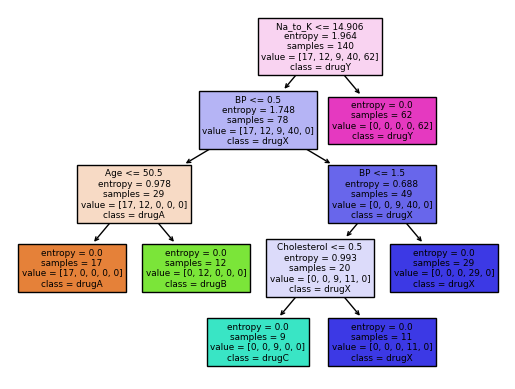

In [25]:
featureNames = my_data.columns[0:5]

graph = tree.plot_tree(drugtree,
                       feature_names=featureNames,
                       class_names=np.unique(y_train),
                       filled=True)

## 3. Support Vector Machine

SVM adalah algoritma supervised learning utk klasifikasi dengan cara menemukan **separator** berupa hyperplane (biasanya utk binary classification)

1. Petakan fitur (kolom, bentuk awalnya 1d) ke ruang dimensi yg lebih tinggi (contohnya 3D) menggunakan fungsi kernel (linear, Radial Basis Function, polinom, sigmoid, dsb)
2. Temukan separatornya (utk di ruang 3d biasanya bentuknya bidang)

- Hyperplane yg baik adalah yg memiliki margin lebih besar (jarak ke support vector)

![SVM](.\ssmodul422_4.jpg)

Kali ini, kita akan melakukan klasifikasi sebuah cell apakah cell tersebut jinak atau ganas (berpotensi kanker)

In [ ]:
#install dulu package bila belum memiliki sklearn
!pip install scikit-learn==0.23.1

### Import Module

In [26]:
#import modul yang diperlukan
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

### Import Dataset

Pada module kali ini, akan digunakan data csv cell samples (`cell_samples.csv`) yang bisa didownload dari:

- [Kaggle](https://www.kaggle.com/datasets/sam1o1/cell-samplescsv)

In [27]:
#memuat dataframe
cell_df=pd.read_csv(r".\cell_samples.csv")

In [28]:
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


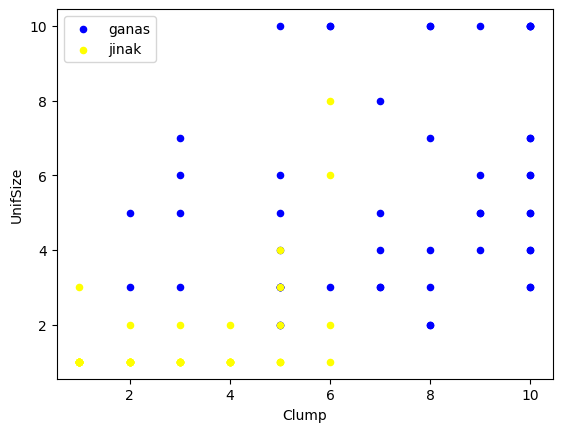

In [29]:
#melihat sebaran datanya menggunakan scatterplot
ax = cell_df[cell_df['Class']==4][0:50].plot(kind='scatter', x='Clump', y = 'UnifSize', color = 'Blue',
                                             label = 'ganas')
cell_df[cell_df['Class']==2][0:50].plot(kind='scatter', x='Clump', y = 'UnifSize', color = 'Yellow', 
                                        label ='jinak',ax=ax)
plt.show()

### Preprocessing

In [30]:
#cek type dari masing2 feature/kolom
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [31]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'],errors="coerce").notnull()] #mengatasi value yg error menjadi NaN
cell_df['BareNuc']=cell_df['BareNuc'].astype('int') #mengubah type menjadi integer
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

### Train Test Split

In [32]:
#set X
feature_df = cell_df[['Clump', 'UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']].values
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [33]:
#set Y
cell_df['Class'] = cell_df['Class'].astype('int')
y=np.asarray(cell_df['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

In [34]:
#train-test split
train_x,test_x,train_y,test_y=train_test_split(X,y, test_size=0.2,random_state=4)
print('Train set:', train_x.shape,train_y.shape)
print('Train set:', test_x.shape,test_y.shape)

Train set: (546, 9) (546,)
Train set: (137, 9) (137,)


### Modelling

In [35]:
#membuat model
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(train_x,train_y)

SVC()

In [36]:
#Prediksi
yhat = clf.predict(test_x)
yhat[0:5]

array([2, 4, 2, 4, 2])

### Evaluasi

In [37]:
#jaccard score
from sklearn.metrics import jaccard_score
jaccard_score(test_y,yhat,pos_label=2)

0.9444444444444444

In [38]:
#f1-score
from sklearn.metrics import f1_score
f1_score(test_y,yhat,pos_label=2)

0.9714285714285714

In [39]:
#visualisasi confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
 
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
print(confusion_matrix(test_y, yhat, labels=[2,4]))

[[85  5]
 [ 0 47]]


Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


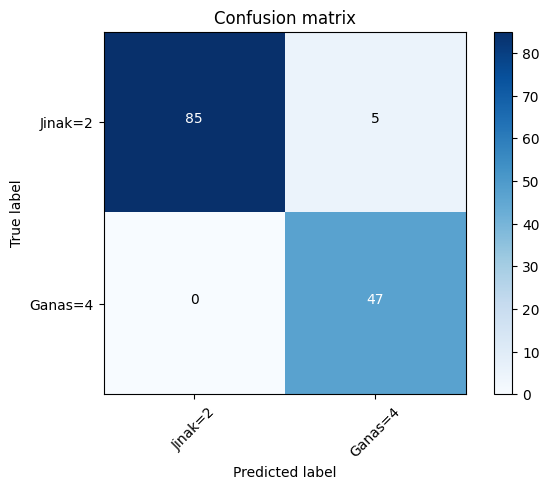

In [40]:
#confusion matrix
cnf_matrix =confusion_matrix(test_y, yhat, labels=[2,4])
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['Jinak=2', 'Ganas=4'],normalize = False, title='Confusion matrix')
